<a href="https://colab.research.google.com/github/Badar97/Progetto_DataScience/blob/main/Analisi_Descrittiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1 ANALISI DESCRITTIVA**

## **1.1 Inizializzazione**

In [1]:
! git clone 'https://github.com/Badar97/Progetto_DataScience'

Cloning into 'Progetto_DataScience'...
remote: Enumerating objects: 108, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 108 (delta 18), reused 0 (delta 0), pack-reused 75
Receiving objects: 100% (108/108), 38.98 MiB | 12.16 MiB/s, done.
Resolving deltas: 100% (37/37), done.


In [2]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 34.1 MB/s eta 0:00:00


In [3]:
pip install pyshp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 2.9 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import descartes
import random

import geopandas as gpd
from shapely.geometry import shape, mapping, Point, Polygon, MultiPolygon
import fiona
import shapefile
import seaborn as sns
from sklearn.cluster import KMeans

%matplotlib inline

In [5]:
url = "https://raw.githubusercontent.com/Badar97/Progetto_DataScience/main/Python/NorwayMeteoDataCompleted.csv"
meteo = pd.read_csv(url)
meteo#.head()

,Unnamed: 0,sourceId,latitude,longtitude,max(air_temperature P1D),max(relative_humidity P1D),max(wind_speed P1D),mean(air_temperature P1D),mean(relative_humidity P1D),mean(wind_speed P1D),sum(precipitation_amount P1D),day,month,year
0,0,SN100,61.134900,12.503900,NaN,NaN,NaN,NaN,NaN,NaN,0.4,1,1,2010
1,1,SN1135,58.990000,11.540800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2010
2,2,SN1151800,50.100278,14.255556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2010
3,3,SN15262,61.674000,8.368500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2010
4,4,SN1531000,45.473056,28.032222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237624,237624,SN50110,60.337200,6.217500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,12,2021
237625,237625,SN98978,70.335700,28.964800,-11.25,89.0,2.6,-12.45,89.0,1.8,NaN,29,12,2021
237626,237626,SN299300,60.301111,19.131389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,12,2021
237627,237627,SN50110,60.337200,6.217500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,12,2021


In [6]:
dropp = ['Unnamed: 0']
meteo.drop(dropp, inplace=True, axis=1)
meteo.head()

,sourceId,latitude,longtitude,max(air_temperature P1D),max(relative_humidity P1D),max(wind_speed P1D),mean(air_temperature P1D),mean(relative_humidity P1D),mean(wind_speed P1D),sum(precipitation_amount P1D),day,month,year
0,SN100,61.134900,12.503900,NaN,NaN,NaN,NaN,NaN,NaN,0.4,1,1,2010
1,SN1135,58.990000,11.540800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2010
2,SN1151800,50.100278,14.255556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2010
3,SN15262,61.674000,8.368500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2010
4,SN1531000,45.473056,28.032222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2010


In [7]:
meteo = meteo.dropna()
meteo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21799 entries, 34 to 235248
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   sourceId                       21799 non-null  object 
 1   latitude                       21799 non-null  float64
 2   longtitude                     21799 non-null  float64
 3   max(air_temperature P1D)       21799 non-null  float64
 4   max(relative_humidity P1D)     21799 non-null  float64
 5   max(wind_speed P1D)            21799 non-null  float64
 6   mean(air_temperature P1D)      21799 non-null  float64
 7   mean(relative_humidity P1D)    21799 non-null  float64
 8   mean(wind_speed P1D)           21799 non-null  float64
 9   sum(precipitation_amount P1D)  21799 non-null  float64
 10  day                            21799 non-null  int64  
 11  month                          21799 non-null  int64  
 12  year                           21799 non-nul

In [8]:
meteo.shape

(21799, 13)

In [9]:
meteo.columns

Index(['sourceId', 'latitude', 'longtitude', 'max(air_temperature P1D)',
       'max(relative_humidity P1D)', 'max(wind_speed P1D)',
       'mean(air_temperature P1D)', 'mean(relative_humidity P1D)',
       'mean(wind_speed P1D)', 'sum(precipitation_amount P1D)', 'day', 'month',
       'year'],
      dtype='object')

In [10]:
newname = {'sourceId': 'sourceID', 'latitude': 'Latitude', 'longtitude': 'Longitude',
           'max(air_temperature P1D)': 'max_air_temp_perday', 'max(relative_humidity P1D)': 'max_rel_hum_perday', 
           'max(wind_speed P1D)': 'max_wind_speed_perday','mean(air_temperature P1D)': 'mean_air_temp_perday',
           'mean(relative_humidity P1D)': 'mean_rel_hum_perday', 'mean(wind_speed P1D)': 'mean_wind_speed_perday', 
           'sum(precipitation_amount P1D)': 'sum_precip_amount_perday', 'day': 'Day', 'month': 'Month', 'year': 'Year'}
meteo.rename(columns=newname, inplace=True)
meteo.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,sourceID,Latitude,Longitude,max_air_temp_perday,max_rel_hum_perday,max_wind_speed_perday,mean_air_temp_perday,mean_rel_hum_perday,mean_wind_speed_perday,sum_precip_amount_perday,Day,Month,Year
34,SN69100,63.4597,10.9305,-2.3,83.0,4.1,-8.50,79.0,3.0,0.00,1,1,2010
40,SN91380,69.3875,20.2823,-9.2,86.0,5.1,-11.75,71.0,2.6,0.30,1,1,2010
41,SN91740,69.7887,20.9553,-8.4,72.0,8.9,-10.90,67.0,6.9,0.00,1,1,2010
80,SN69100,63.4597,10.9305,-13.4,84.0,4.6,-15.15,82.0,3.6,0.00,2,1,2010
86,SN91380,69.3875,20.2823,-8.7,79.0,3.3,-12.35,73.0,2.3,0.15,2,1,2010


## **1.2 Quantità di dati in base al sourceID**

In [11]:
elem = meteo.sourceID.value_counts().count()
print('num of sourceID is: '+str(elem))
meteo['sourceID'].value_counts()


num of sourceID is: 7


SN69100    4360
SN61630    4325
SN91380    4207
SN91740    3222
SN16400    2472
SN32240    1833
SN50110    1380
Name: sourceID, dtype: int64

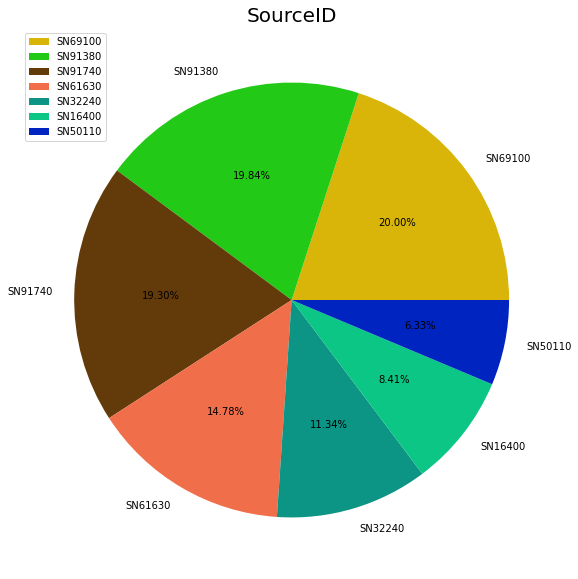

In [14]:
arr = meteo['sourceID'].unique()
labels = arr.tolist()

size = meteo['sourceID'].value_counts()
colors = lambda n: ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(n)]

plt.figure(figsize=(10,10))
plt.pie(size, colors=colors(7), labels=labels, autopct='%.2f%%')
plt.title('SourceID', fontsize=20)
plt.axis('off')
plt.legend()
plt.show(block=False)
plt.pause(3)
plt.close()

## **1.3 Mappa**

In [15]:
geometry = [Point(xy) for xy in zip(meteo.Longitude, meteo.Latitude)]
meteo['geometry'] = geometry
crs = {'init': 'epsg:4326'}
meteo_locs = gpd.GeoDataFrame(meteo, crs=crs, geometry=geometry)
meteo_locs.head()

<ipython-input-15-193c6373cca3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meteo['geometry'] = geometry
/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,sourceID,Latitude,Longitude,max_air_temp_perday,max_rel_hum_perday,max_wind_speed_perday,mean_air_temp_perday,mean_rel_hum_perday,mean_wind_speed_perday,sum_precip_amount_perday,Day,Month,Year,geometry
34,SN69100,63.4597,10.9305,-2.3,83.0,4.1,-8.50,79.0,3.0,0.00,1,1,2010,POINT (10.93050 63.45970)
40,SN91380,69.3875,20.2823,-9.2,86.0,5.1,-11.75,71.0,2.6,0.30,1,1,2010,POINT (20.28230 69.38750)
41,SN91740,69.7887,20.9553,-8.4,72.0,8.9,-10.90,67.0,6.9,0.00,1,1,2010,POINT (20.95530 69.78870)
80,SN69100,63.4597,10.9305,-13.4,84.0,4.6,-15.15,82.0,3.6,0.00,2,1,2010,POINT (10.93050 63.45970)
86,SN91380,69.3875,20.2823,-8.7,79.0,3.3,-12.35,73.0,2.3,0.15,2,1,2010,POINT (20.28230 69.38750)


In [16]:
cols=['Year', 'Month', 'Day']
meteo['Date'] = meteo[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
meteo['Date']=pd.to_datetime(meteo['Date'])
#meteo.drop(cols, inplace=True, axis=1)
meteo.head()

<ipython-input-16-48aef3612a97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meteo['Date'] = meteo[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
<ipython-input-16-48aef3612a97>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meteo['Date']=pd.to_datetime(meteo['Date'])


,sourceID,Latitude,Longitude,max_air_temp_perday,max_rel_hum_perday,max_wind_speed_perday,mean_air_temp_perday,mean_rel_hum_perday,mean_wind_speed_perday,sum_precip_amount_perday,Day,Month,Year,geometry,Date
34,SN69100,63.4597,10.9305,-2.3,83.0,4.1,-8.50,79.0,3.0,0.00,1,1,2010,POINT (10.93050 63.45970),2010-01-01
40,SN91380,69.3875,20.2823,-9.2,86.0,5.1,-11.75,71.0,2.6,0.30,1,1,2010,POINT (20.28230 69.38750),2010-01-01
41,SN91740,69.7887,20.9553,-8.4,72.0,8.9,-10.90,67.0,6.9,0.00,1,1,2010,POINT (20.95530 69.78870),2010-01-01
80,SN69100,63.4597,10.9305,-13.4,84.0,4.6,-15.15,82.0,3.6,0.00,2,1,2010,POINT (10.93050 63.45970),2010-01-02
86,SN91380,69.3875,20.2823,-8.7,79.0,3.3,-12.35,73.0,2.3,0.15,2,1,2010,POINT (20.28230 69.38750),2010-01-02


In [17]:
area_shp = gpd.read_file('Progetto_DataScience/Python/ShapeFiles/norwshape/norw.shp')
area_shp

,id_0,iso,name_0,id_1,name_1,hasc_1,ccn_1,cca_1,type_1,engtype_1,nl_name_1,varname_1,geometry
0,169.0,NOR,Norway,1.0,Ãstfold,NO.OF,0.0,None,Fylke,County,None,Oestfold fylke,"MULTIPOLYGON (((10.87472 58.96069, 10.87472 58..."
1,169.0,NOR,Norway,2.0,Akershus,NO.AK,0.0,None,Fylke,County,None,Akershus fylke,"MULTIPOLYGON (((10.67028 59.50403, 10.67028 59..."
2,169.0,NOR,Norway,3.0,Aust-Agder,NO.AA,0.0,None,Fylke,County,None,Aust-Agder fylke|Austur-Agðir|Nedenes,"MULTIPOLYGON (((8.24472 58.11792, 8.24472 58.1..."
3,169.0,NOR,Norway,4.0,Buskerud,NO.BU,0.0,None,Fylke,County,None,Buskerud fylke,"MULTIPOLYGON (((10.50083 59.48986, 10.50083 59..."
4,169.0,NOR,Norway,5.0,Finnmark,NO.FI,0.0,None,Fylke,County,None,Finnmark fylke|Finmarken|Finnmárkku|Finnmörk,"MULTIPOLYGON (((30.44427 69.74427, 30.44583 69..."
5,169.0,NOR,Norway,6.0,Hedmark,NO.HE,0.0,None,Fylke,County,None,Hedmark fylke|Hedemarken|Heiðmörk,"POLYGON ((10.90333 62.69855, 10.90470 62.69411..."
6,169.0,NOR,Norway,7.0,Hordaland,NO.HO,0.0,None,Fylke,County,None,Hordaland fylke|Hörðaland|Søndre Bergenhus,"MULTIPOLYGON (((5.14028 59.52097, 5.14028 59.5..."
7,169.0,NOR,Norway,8.0,Møre og Romsdal,NO.MR,0.0,None,Fylke,County,None,Moere og Romsdal fylk|Møre|Romsdal,"MULTIPOLYGON (((5.88958 62.05208, 5.89167 62.0..."
8,169.0,NOR,Norway,9.0,Nord-Trøndelag,NO.NT,0.0,None,Fylke,County,None,Nord-Troendelag fylke|Nordre Trondhjem|Norður-...,"MULTIPOLYGON (((10.90417 63.46875, 10.90417 63..."
9,169.0,NOR,Norway,10.0,Nordland,NO.NO,0.0,None,Fylke,County,None,Nordland fylke,"MULTIPOLYGON (((12.13958 65.11667, 12.13750 65..."


In [18]:
coord = meteo['geometry'].unique()
fc = fiona.open("Progetto_DataScience/Python/ShapeFiles/norwshape/norw.shp")
#print(fc.schema)
for feature in fc:
    if shape(feature['geometry']).contains(coord[0]):
          print('for p0: '+ feature['properties']['name_1'], coord[0])
    if shape(feature['geometry']).contains(coord[1]):
          print('for p1: '+ feature['properties']['name_1'], coord[1])
    if shape(feature['geometry']).contains(coord[2]):
          print('for p2: '+ feature['properties']['name_1'], coord[2])
    if shape(feature['geometry']).contains(coord[3]):
          print('for p3: '+ feature['properties']['name_1'], coord[3])
    if shape(feature['geometry']).contains(coord[4]):
          print('for p4: '+ feature['properties']['name_1'], coord[4])
    if shape(feature['geometry']).contains(coord[5]):
          print('for p5: '+ feature['properties']['name_1'], coord[5])
    if shape(feature['geometry']).contains(coord[6]):
          print('for p6: '+ feature['properties']['name_1'], coord[6])

for p6: Hordaland POINT (6.2175 60.3372)
for p0: Nord-Trøndelag POINT (10.9305 63.4597)
for p3: Oppland POINT (8.2 62.2583)
for p5: Oppland POINT (9.2143 62.0172)
for p4: Telemark POINT (9.0287 59.4175)
for p1: Troms POINT (20.2823 69.3875)
for p2: Troms POINT (20.9553 69.7887)


Text(0.5, 1.0, 'Norway')

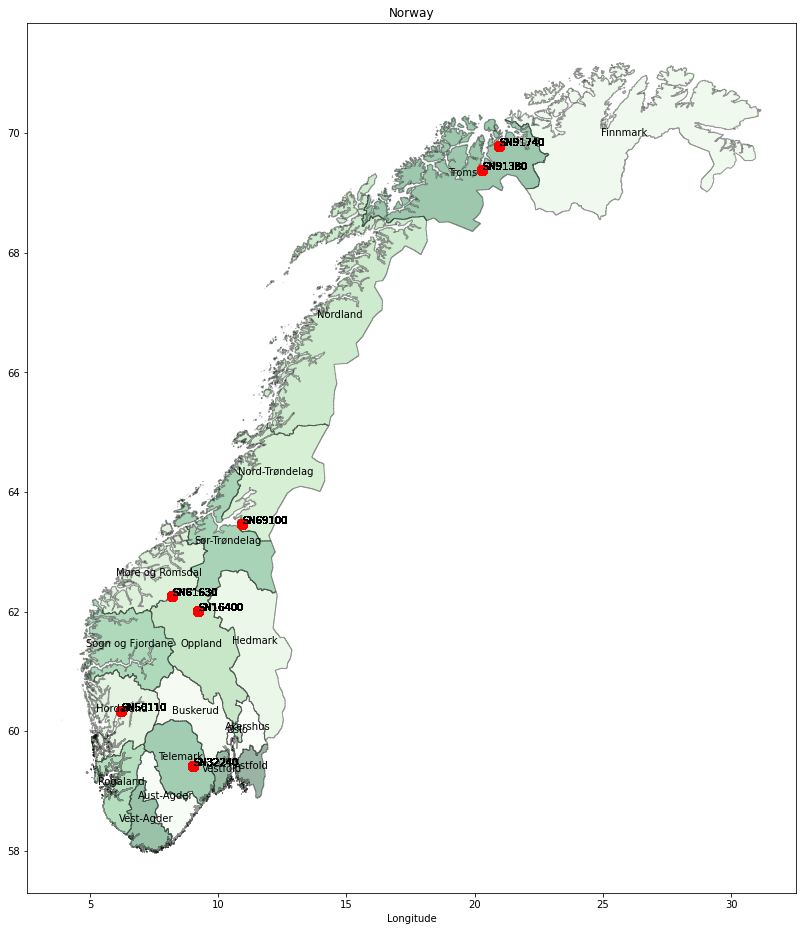

In [19]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

fig, ax = plt.subplots(figsize = (16,16))
area_shp.plot(column=area_shp.name_1, cmap='Greens', ax=ax, alpha = 0.4, edgecolor='black')
area_shp.apply(lambda x: ax.annotate(s=x['name_1'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
meteo_locs.geometry.plot(marker='o', color='red', markersize=100, ax=ax, label = 'Locations of sourceID')
label_point(meteo.Longitude, meteo.Latitude, meteo.sourceID, meteo.set_index('Longitude')['Latitude'].plot(style='o', color='red', label=''))

plt.title('Norway')

## **1.4 Distribuzioni**

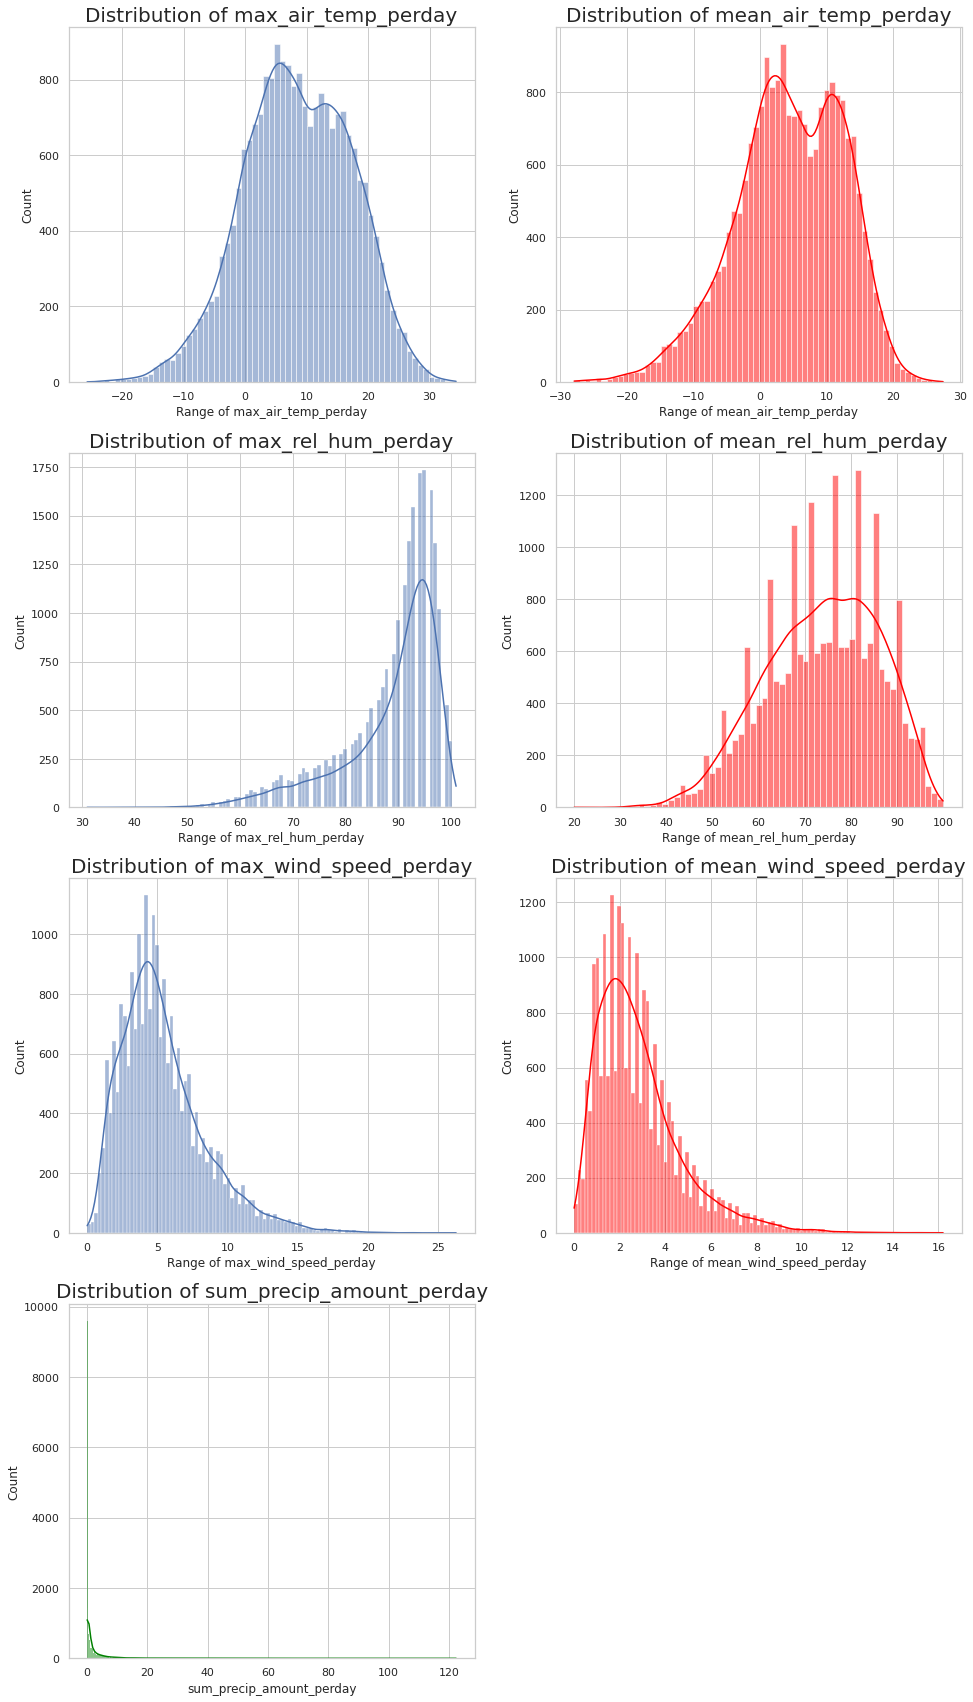

In [78]:
plt.figure(figsize=(16,30))
plt.subplot(4, 2, 1)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='max_air_temp_perday', kde=True)
plt.title('Distribution of max_air_temp_perday', fontsize = 20)
plt.xlabel('Range of max_air_temp_perday')
plt.ylabel('Count')


plt.subplot(4, 2, 2)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='mean_air_temp_perday', color = 'red', kde=True)
plt.title('Distribution of mean_air_temp_perday', fontsize = 20)
plt.xlabel('Range of mean_air_temp_perday')
plt.ylabel('Count')

plt.subplot(4, 2, 3)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='max_rel_hum_perday', kde=True)
plt.title('Distribution of max_rel_hum_perday', fontsize = 20)
plt.xlabel('Range of max_rel_hum_perday')
plt.ylabel('Count')


plt.subplot(4, 2, 4)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='mean_rel_hum_perday', color = 'red', kde=True)
plt.title('Distribution of mean_rel_hum_perday', fontsize = 20)
plt.xlabel('Range of mean_rel_hum_perday')
plt.ylabel('Count')

plt.subplot(4, 2, 5)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='max_wind_speed_perday', kde=True)
plt.title('Distribution of max_wind_speed_perday', fontsize = 20)
plt.xlabel('Range of max_wind_speed_perday')
plt.ylabel('Count')

plt.subplot(4, 2, 6)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='mean_wind_speed_perday', color = 'red', kde=True)
plt.title('Distribution of mean_wind_speed_perday', fontsize = 20)
plt.xlabel('Range of mean_wind_speed_perday')
plt.ylabel('Count')

plt.subplot(4, 2, 7)
sns.histplot(meteo, x='sum_precip_amount_perday', color = 'green', kde=True)
plt.title('Distribution of sum_precip_amount_perday', fontsize = 20)

plt.show()

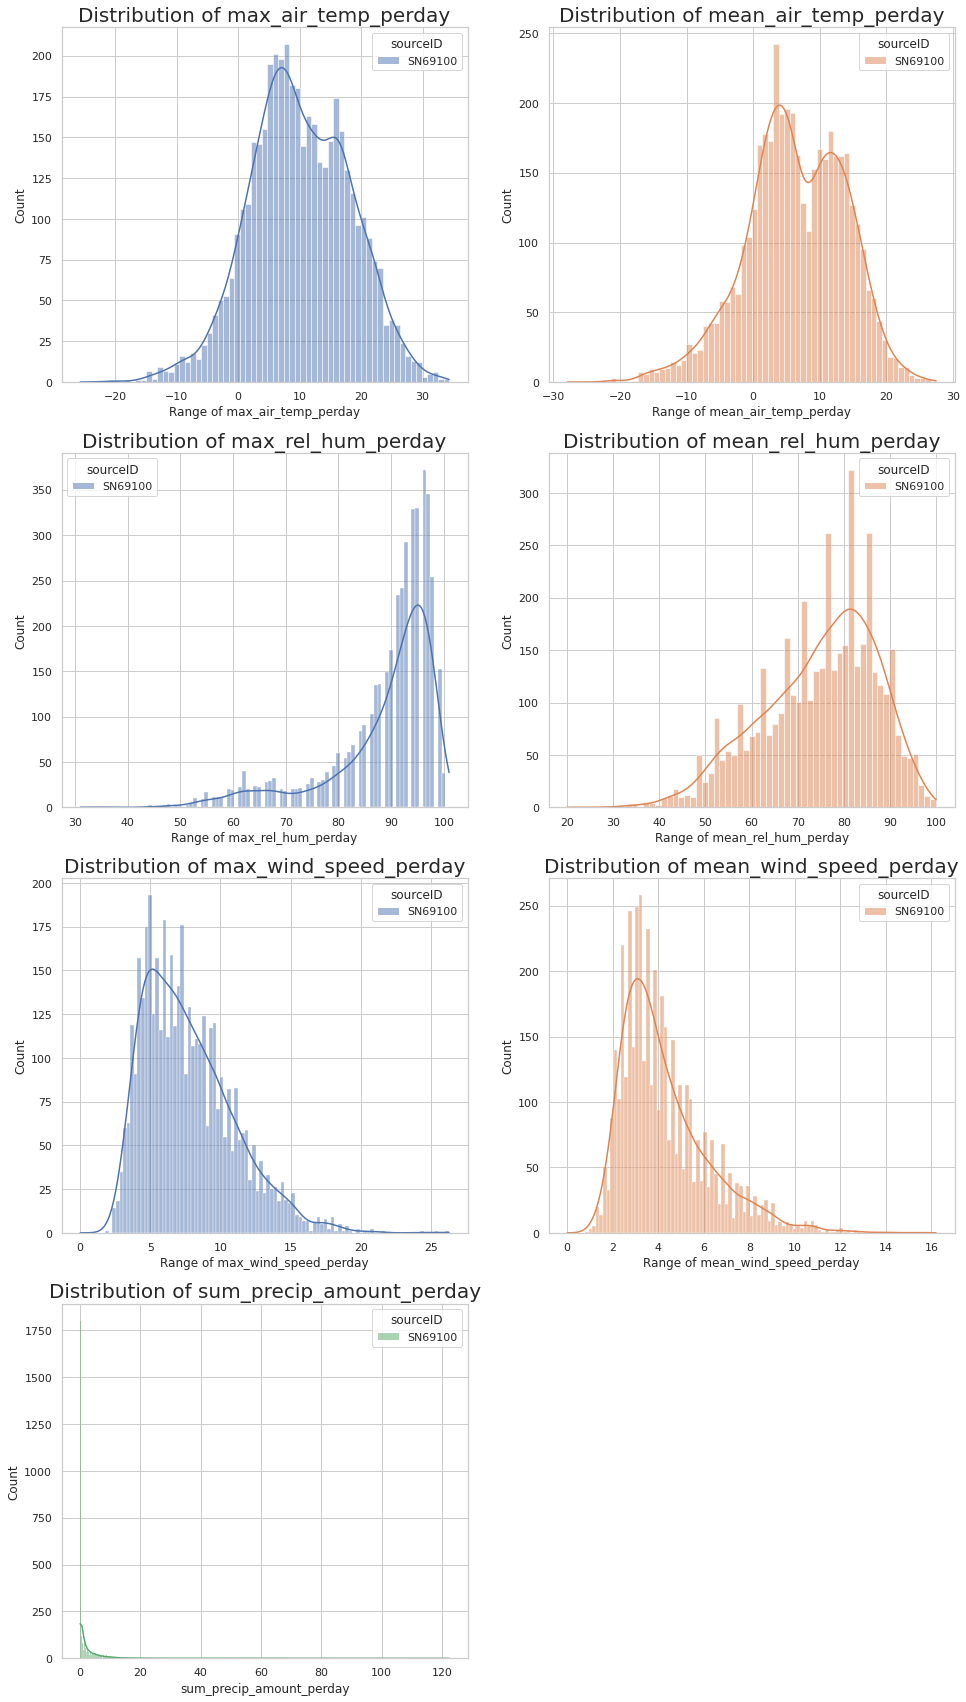

In [74]:
plt.figure(figsize=(16,30))

plt.subplot(4, 2, 1)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='max_air_temp_perday', kde=True, hue=('sourceID'), hue_order=['SN69100'])
plt.title('Distribution of max_air_temp_perday', fontsize = 20)
plt.xlabel('Range of max_air_temp_perday')
plt.ylabel('Count')


plt.subplot(4, 2, 2)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='mean_air_temp_perday', color = 'red', kde=True, hue=('sourceID'), hue_order=['SN69100'], palette=["C1"])
plt.title('Distribution of mean_air_temp_perday', fontsize = 20)
plt.xlabel('Range of mean_air_temp_perday')
plt.ylabel('Count')

plt.subplot(4, 2, 3)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='max_rel_hum_perday', kde=True, hue=('sourceID'), hue_order=['SN69100'])
plt.title('Distribution of max_rel_hum_perday', fontsize = 20)
plt.xlabel('Range of max_rel_hum_perday')
plt.ylabel('Count')


plt.subplot(4, 2, 4)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='mean_rel_hum_perday', color = 'red', kde=True, hue=('sourceID'), hue_order=['SN69100'], palette=["C1"])
plt.title('Distribution of mean_rel_hum_perday', fontsize = 20)
plt.xlabel('Range of mean_rel_hum_perday')
plt.ylabel('Count')

plt.subplot(4, 2, 5)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='max_wind_speed_perday', kde=True, hue=('sourceID'), hue_order=['SN69100'])
plt.title('Distribution of max_wind_speed_perday', fontsize = 20)
plt.xlabel('Range of max_wind_speed_perday')
plt.ylabel('Count')


plt.subplot(4, 2, 6)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='mean_wind_speed_perday', color = 'red', kde=True, hue=('sourceID'), hue_order=['SN69100'], palette=["C1"])
plt.title('Distribution of mean_wind_speed_perday', fontsize = 20)
plt.xlabel('Range of mean_wind_speed_perday')
plt.ylabel('Count')

plt.subplot(4, 2, 7)
sns.histplot(meteo, x='sum_precip_amount_perday', kde=True, hue=('sourceID'), hue_order=['SN69100'], palette=["C2"])
plt.title('Distribution of sum_precip_amount_perday', fontsize = 20)

plt.show()

## **1.5 Andamento Temporale**

Text(0.5, 1.0, 'Mean Air Temperature')

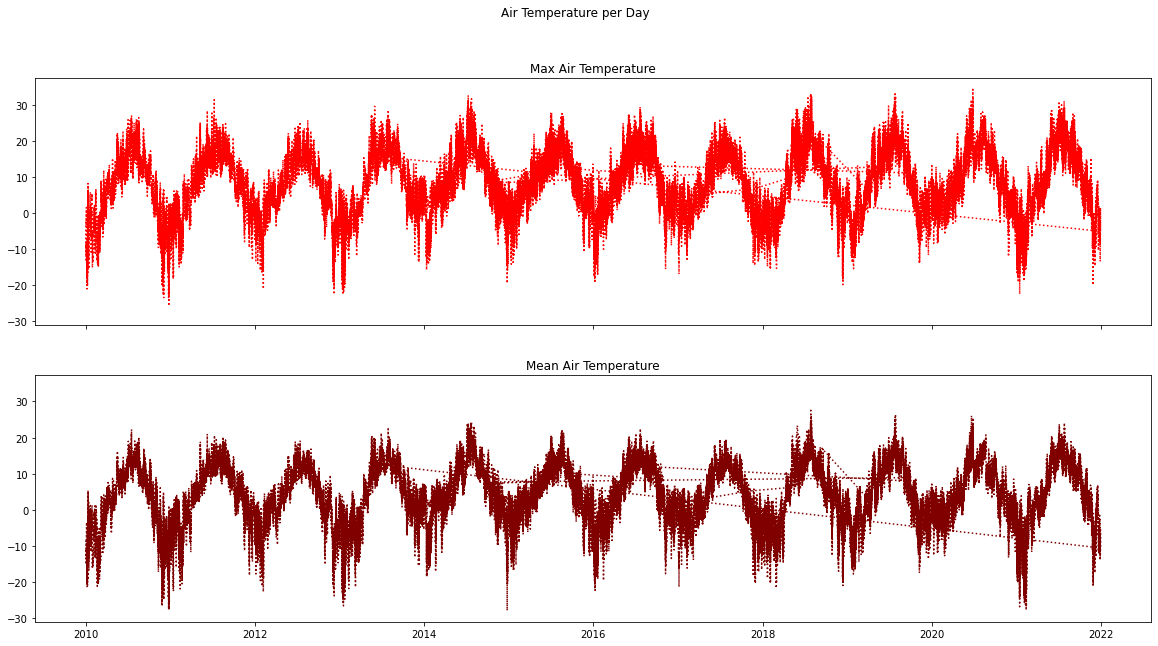

In [20]:
fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize = (20,10))
fig.suptitle('Air Temperature per Day')
axs[0].plot(meteo.Date, meteo.max_air_temp_perday, color='red', ls='dotted')
axs[0].set_title("Max Air Temperature")
axs[1].plot(meteo.Date, meteo.mean_air_temp_perday, color='maroon', ls='dotted')
axs[1].set_title("Mean Air Temperature")

Text(0.5, 1.0, 'Mean Relative Humidity')

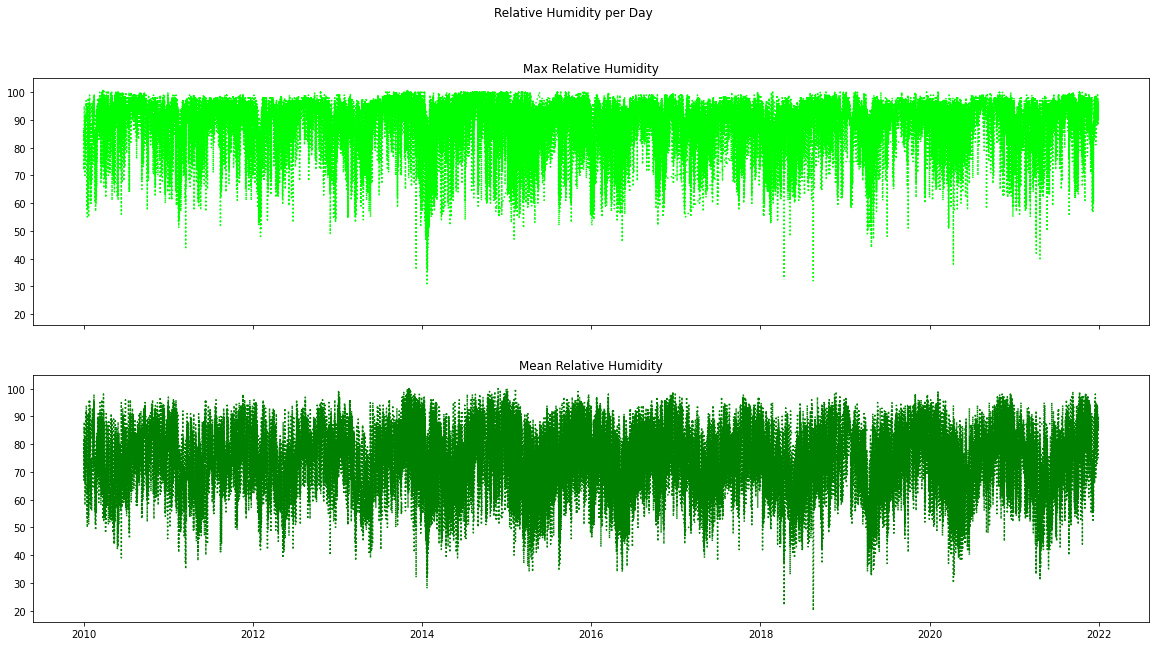

In [21]:
fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize = (20,10))
fig.suptitle('Relative Humidity per Day')
axs[0].plot(meteo.Date, meteo.max_rel_hum_perday, color='lime', ls='dotted')
axs[0].set_title("Max Relative Humidity")
axs[1].plot(meteo.Date, meteo.mean_rel_hum_perday, color='green', ls='dotted')
axs[1].set_title("Mean Relative Humidity")

Text(0.5, 1.0, 'Mean Wind Speed')

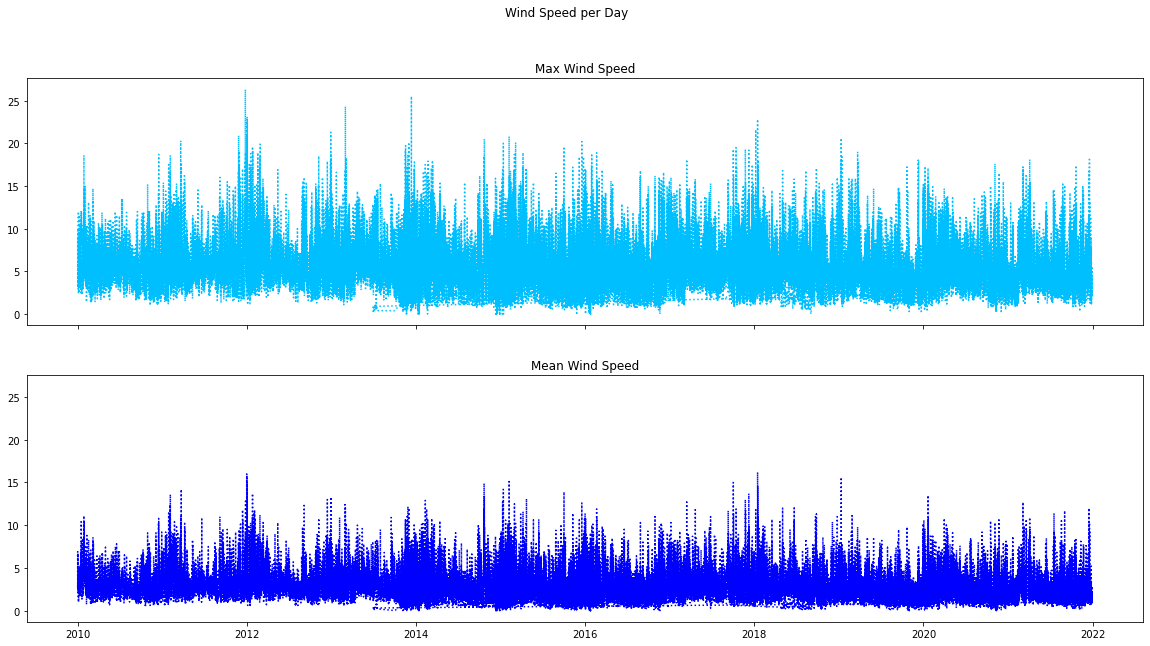

In [22]:
fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize = (20,10))
fig.suptitle('Wind Speed per Day')
axs[0].plot(meteo.Date, meteo.max_wind_speed_perday, color='deepskyblue', ls='dotted')
axs[0].set_title("Max Wind Speed")
axs[1].plot(meteo.Date, meteo.mean_wind_speed_perday, color='blue', ls='dotted')
axs[1].set_title("Mean Wind Speed")

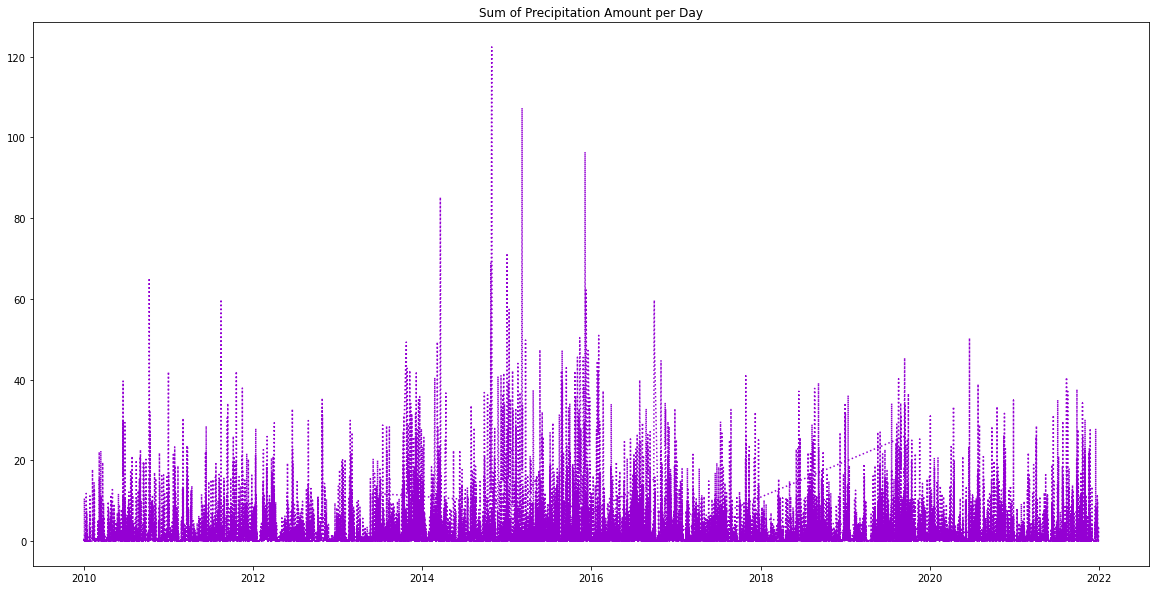

In [23]:
plt.figure(figsize=(20, 10))
plt.title('Sum of Precipitation Amount per Day')
plt.plot(meteo.Date, meteo.sum_precip_amount_perday, color='darkviolet', ls='dotted')
plt.show()

## **1.6 Correlazioni**

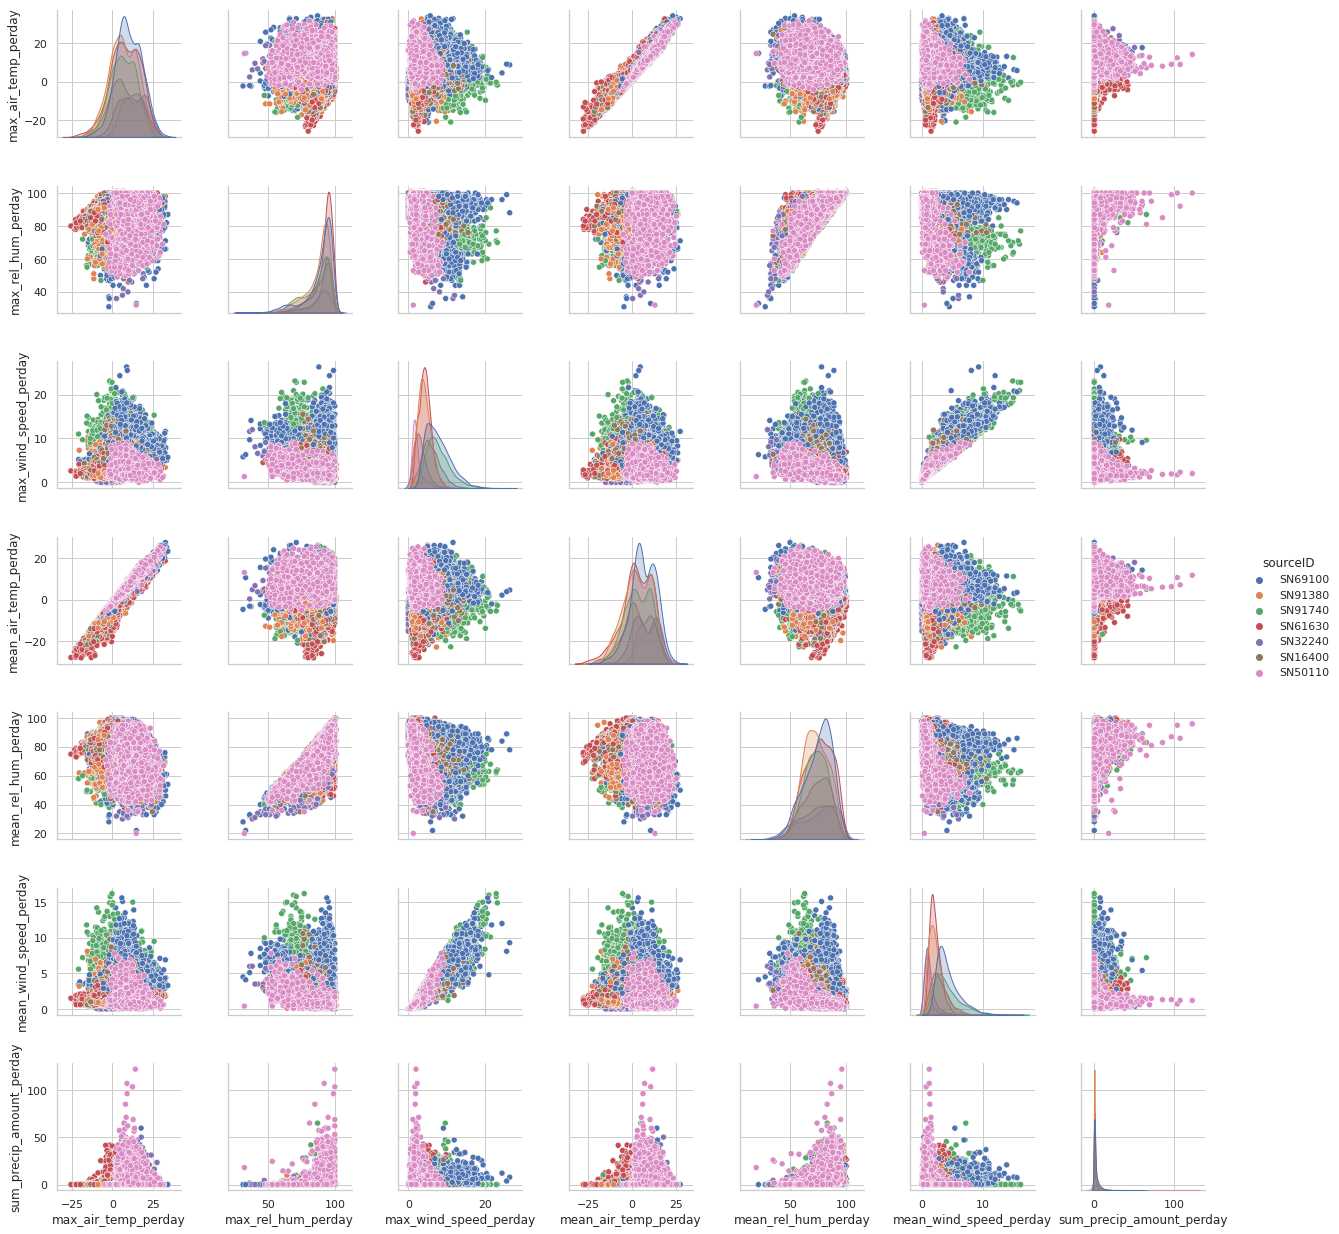

In [79]:
sns.pairplot(meteo.drop(['Latitude', 'Longitude', 'Year', 'Month', 'Day'], axis=1), hue='sourceID')

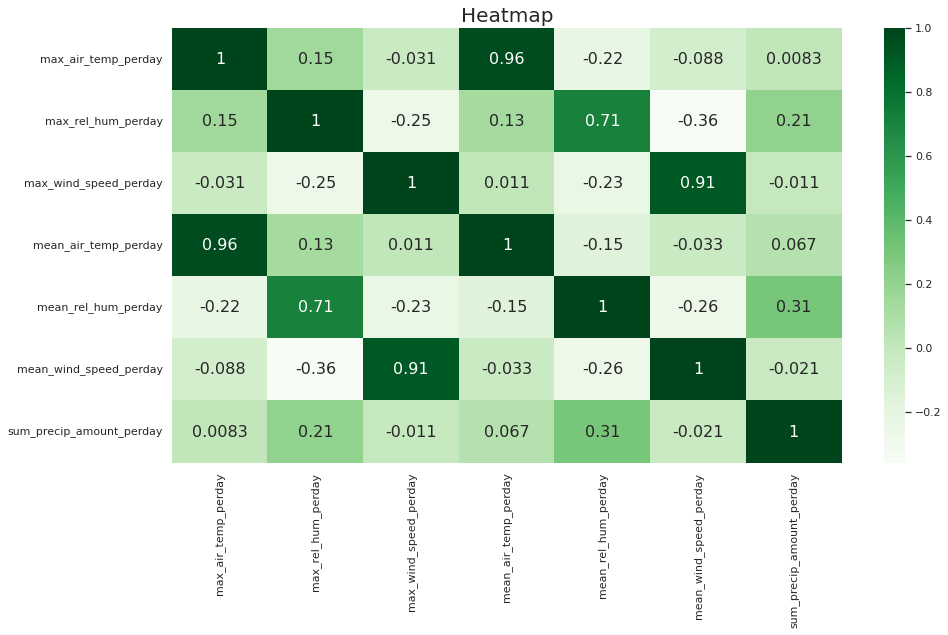

In [80]:
plt.figure(figsize=(15,8))
sns.heatmap(meteo.drop(['Latitude', 'Longitude', 'Year', 'Month', 'Day'], axis=1).corr(), cmap = 'Greens', annot = True, annot_kws={"fontsize": 16})
plt.title('Heatmap', fontsize = 20)
plt.show()

## **1.7 Altro**

In [28]:
meteo.loc[meteo['max_air_temp_perday'].idxmax()]

sourceID                                    SN69100
Latitude                                    63.4597
Longitude                                   10.9305
max_air_temp_perday                            34.3
max_rel_hum_perday                             87.0
max_wind_speed_perday                           5.7
mean_air_temp_perday                          23.25
mean_rel_hum_perday                            54.0
mean_wind_speed_perday                          3.3
sum_precip_amount_perday                        0.0
Day                                              27
Month                                             6
Year                                           2020
geometry                    POINT (10.9305 63.4597)
Date                            2020-06-27 00:00:00
Name: 176214, dtype: object

In [29]:
meteo.loc[meteo['max_air_temp_perday'].idxmin()]

sourceID                                SN61630
Latitude                                62.2583
Longitude                                   8.2
max_air_temp_perday                       -25.7
max_rel_hum_perday                         80.0
max_wind_speed_perday                       2.6
mean_air_temp_perday                      -27.8
mean_rel_hum_perday                        75.0
mean_wind_speed_perday                      1.5
sum_precip_amount_perday                    0.0
Day                                          25
Month                                        12
Year                                       2010
geometry                    POINT (8.2 62.2583)
Date                        2010-12-25 00:00:00
Name: 16500, dtype: object

In [30]:
meteo.loc[meteo['max_rel_hum_perday'].idxmax()]

sourceID                                SN61630
Latitude                                62.2583
Longitude                                   8.2
max_air_temp_perday                         7.1
max_rel_hum_perday                        101.0
max_wind_speed_perday                       4.1
mean_air_temp_perday                      -0.05
mean_rel_hum_perday                        75.0
mean_wind_speed_perday                      1.7
sum_precip_amount_perday                   0.95
Day                                          24
Month                                         3
Year                                       2010
geometry                    POINT (8.2 62.2583)
Date                        2010-03-24 00:00:00
Name: 3804, dtype: object

In [31]:
meteo.loc[meteo['max_wind_speed_perday'].idxmax()]

sourceID                                    SN69100
Latitude                                    63.4597
Longitude                                   10.9305
max_air_temp_perday                             8.8
max_rel_hum_perday                             88.0
max_wind_speed_perday                          26.3
mean_air_temp_perday                           4.65
mean_rel_hum_perday                            78.0
mean_wind_speed_perday                          9.3
sum_precip_amount_perday                        7.8
Day                                              26
Month                                            12
Year                                           2011
geometry                    POINT (10.9305 63.4597)
Date                            2011-12-26 00:00:00
Name: 33338, dtype: object

In [32]:
meteo.loc[meteo['sum_precip_amount_perday'].idxmax()]

sourceID                                   SN50110
Latitude                                   60.3372
Longitude                                   6.2175
max_air_temp_perday                           14.2
max_rel_hum_perday                           100.0
max_wind_speed_perday                          2.0
mean_air_temp_perday                         11.75
mean_rel_hum_perday                           96.0
mean_wind_speed_perday                         1.2
sum_precip_amount_perday                     122.4
Day                                             28
Month                                           10
Year                                          2014
geometry                    POINT (6.2175 60.3372)
Date                           2014-10-28 00:00:00
Name: 229761, dtype: object